In [1]:
import configparser
import random
import numpy as np
import tensorflow as tf
from sklearn.metrics import roc_auc_score, average_precision_score
from keras.models import load_model
from keras.callbacks import LearningRateScheduler, ModelCheckpoint, Callback
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.models import load_model, Model
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, \
                        Input, Dense, GlobalAveragePooling2D, Dropout
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.utils import to_categorical
from collections import Counter
import keras.optimizers
from keras.callbacks import Callback
from keras.callbacks import EarlyStopping
from keras.utils import plot_model
import glob, os
import tensorflow as tf
import pandas as pd
from random import shuffle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from sklearn.metrics import roc_auc_score, average_precision_score, mean_absolute_error, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import pandas as pd
from pycausal import search as s
from pycausal.pycausal import pycausal as pc
from collections import defaultdict
from numpy.polynomial.polynomial import polyfit  
from scipy.stats import pearsonr
from pylab import text
from pycausal import prior as p
import itertools

# select your GPU Here
os.environ["CUDA_VISIBLE_DEVICES"]="" #Comment this line out if you want all GPUS (2 hehe)

# python full-display web browser
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


def get_model(dense, dropouts, inputs):
    # dense is an ordered list of the number of dense neurons like [1024, 2048, 1024]
    # dropouts is an ordered list of the dropout masks like [0.2, 0.3, 0.4]
    inputs = keras.Input(shape = (inputs,))
    x = keras.layers.Dense(dense[0], activation = 'relu')(inputs)
    x = keras.layers.Dropout(dropouts[0])(x, training=False)
    for den, drop in zip(dense[1:], dropouts[1:]):
        x = keras.layers.Dense(den, activation = 'relu')(x)
        x = keras.layers.Dropout(drop)(x, training=False)
    outputs = keras.layers.Dense(1, activation = 'linear')(x)
    model = keras.Model(inputs, outputs)
    return model

def get_bic(df, prior, penalty = 2):

    tetrad.run(algoId = 'fges', dfs = df,  scoreId = 'sem-bic', dataType = 'continuous',
               structurePrior = 1.0, samplePrior = 1, maxDegree = -1, maxPathLength = -1, priorKnowledge = prior,
               completeRuleSetUsed = False, faithfulnessAssumed = True, verbose = True, penalty = 200
               )
    
    BIC = tetrad.getTetradGraph().getAllAttributes().toString()
    BIC = float(BIC.split('=')[-1].split('}')[0])
    return BIC #/ len(df)
def normalize(a):
    return (a - np.min(a)) / (np.max(a) - np.min(a))
def make_categorical(df, complete_df, categoricals):   
    retval = None
    for key in df.columns:
        if retval is not None:
            if key in categoricals:
                retval = np.concatenate((retval, to_categorical(df[key], len(complete_df[key].unique()))), axis = 1)
            else:
                retval = np.concatenate((retval, df[key].values[...,np.newaxis]), axis = 1)
        else:
            if key in categoricals:
                retval = to_categorical(df[key], len(complete_df[key].unique()))
            else:
                retval = df[key]
    return retval
num_models = 100    
pc = pc()
pc.start_vm(java_max_heap_size = '21000M')
tetrad = s.tetradrunner()

models = []
model_names = []



randomize = False
if randomize:
    layers = [256, 512, 1024, 2048, 4096]
    for i in range(num_models):
        network = []
        for j in range(3):
            network.append(layers[random.randint(0,len(layers) -1)])
        models.append(network)
        model_names.append('temp/simb' + str(i))
    print(models, model_names)    
else:
    model_layers = [512, 256]
    for i in range(num_models):
        models.append(model_layers)
        model_names.append('temp/simb' + str(i))

print(models, model_names)

/home/tkyono/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


[[512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [51

In [2]:
import networkx as nx

def random_dag(nodes, edges):
    """Generate a random Directed Acyclic Graph (DAG) with a given number of nodes and edges."""
    G = nx.DiGraph()
    for i in range(nodes):
        G.add_node(i)
    while edges > 0:
        a = random.randint(0,nodes-1)
        b=a
        while b==a:
            b = random.randint(0,nodes-1)
        G.add_edge(a,b)
        if nx.is_directed_acyclic_graph(G):
            edges -= 1
        else:
            # we closed a loop!
            G.remove_edge(a,b)
    return G



In [3]:
import pydot
from IPython.display import SVG

def examine_graph_continuous(df, prior = None):
    tetrad.run(algoId = 'fges', dfs = df,  scoreId = 'sem-bic', dataType = 'continuous',
               structurePrior = 1.0, samplePrior = 1, maxDegree = -1, maxPathLength = -1, priorKnowledge = prior,
               completeRuleSetUsed = False, faithfulnessAssumed = True, verbose = True,
               )
    return tetrad.getTetradGraph()

def gen_data(list_vertex = [], list_edges = [], mean = 0, var = 1, SIZE = 20000):
    g = []
    for v in list_vertex:
        g.append(np.random.normal(mean,var,SIZE))
        
    for edge in list_edges:
        g[edge[1]] += g[edge[0]]
    g = np.swapaxes(g,0,1)
    return pd.DataFrame(g, columns = list(map(str, list_vertex)))



1

In [7]:

bestMSE = []
bestBIC = []
bestCOMBO = []
averageDegree = []
targetDegree = []
target_inD = []
target_outD = []

for t in range(50):
    train_size = 30000
    nodes = 3
    test_mean = 1
    test_var = 2
    test_size = 3000
    
    G = random_dag(nodes, random.randint(nodes-1, nodes*nodes)) # since max number of edges is n^2
    df = gen_data(np.arange(nodes), G.edges, SIZE = train_size)
    require = []
    for i in G.edges:
        require.append([str(i[0]), str(i[1])])  
    prior = p.knowledge(requiredirect = require)
    examine_graph_continuous(df, prior)
    
    # Check to make sure that graph matches our prior knowledge. Or else abort this test.
    a = set()
    for i in tetrad.getEdges():
        a.add((i[0], i[-1]))
    b = set()
    for i in require:
        b.add((i[0], i[1]))
    print("A = ", a)
    print("B = ", b)
    if a != b:
        continue
        
    known_conx = set({})
    for i in tetrad.getEdges():
        if ' --> ' in i:
            known_conx.add((i.split(' --> ')[0], i.split(' --> ')[1]))
    known_conx
        
    # Need to set our inputs and outputs
    inputs = set(np.arange(nodes))
    target = str(a.pop()[random.randint(0,1)])
    inputs.remove(int(target))
    inputs = list(map(str, inputs))
    df_test = gen_data(np.arange(nodes), G.edges, mean = test_mean, var = test_var, SIZE = test_size)
    target = [target]
    
    print("Inputs = ", inputs)
    print("Target = ", target)
    #df.drop(df_test.index, inplace = True)
    #df_test.reset_index(inplace = True)
    #df.sample(frac= 1).reset_index(inplace = True) # this will shuffle and reset index

    x_test = df_test[inputs]
    y_test = df_test[target]

    causal_split = 0.2
    val_split = 0.2
    train_split = 1 - (causal_split + val_split)

    x_causal = df[inputs][-int(causal_split * len(df)) :]
    y_causal = df[target][-int(causal_split * len(df)) :]

    x_val = df[inputs][int(train_split * len(df)):-int(causal_split * len(df))]
    y_val = df[target][int(train_split * len(df)):-int(causal_split * len(df))]

    x_train = df[inputs][:int(train_split * len(df))]
    y_train = df[target][:int(train_split * len(df))]

    verbosity = 0

    for idx, model_name in enumerate(model_names):
        if type(models[idx]) is list:
            #clear session
            keras.backend.clear_session() 
            #get model according to specification
            model = get_model(models[idx], [0.2] * len(models), np.shape(x_train)[1])
            callbacks = [ModelCheckpoint(model_name, verbose= verbosity, monitor='val_loss',save_best_only=True), 
                         EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=2, verbose= verbosity, mode='auto')]
            model.compile(optimizer = optimizers.SGD(lr = 0.0001, momentum = 0.9, ), loss='mean_squared_error', metrics = ['mse'])
            #print(len(X), len(y))
            model.fit(x_train, y_train, epochs = 20, validation_data = (x_val, y_val), callbacks = callbacks, batch_size = 32, verbose = verbosity)
        else:
            models[idx].fit(X,y)





    generalization = []
    metrics = []
    proposed = []
    x_causal.reset_index(drop=True, inplace = True)
    for idx, model_name in enumerate(model_names):
        #print(model_name)
        if type(models[idx]) is list:
            keras.backend.clear_session()
            model = load_model(model_name)
        else:
            model = models[idx]

        y_pred = model.predict(x_test)
        generalization.append(mean_absolute_error(y_pred, y_test))

        #### CHECK FOR CAUSAL METRIC HERE
        y_causal_pred = model.predict(x_causal)
        causal_targets = pd.DataFrame(y_causal_pred, columns = target)
        
        #causal_targets.reset_index(drop=True, inplace = True)
        causal_df = x_causal.join(causal_targets)



        metrics.append(mean_absolute_error(y_causal_pred, y_causal))
        #print(x_causal.head)
        bic_pred = get_bic(causal_df, prior)
        #print(bic_pred, tetrad.getEdges())

        found_conx = set({})
        for i in tetrad.getEdges():
            if ' --> ' in i:
                found_conx.add((i.split(' --> ')[0], i.split(' --> ')[1]))
        found_conx

        if found_conx == known_conx:
            proposed.append(bic_pred)
        else:
            print("******Found an error")
            print(bic_pred, tetrad.getEdges())
            # for now just remove bad model.  Will need to add it to distance metric.
            proposed.append(bic_pred)
            #metrics = metrics[:-1]
            #generalization = generalization[:-1]
    nbest = 10
    print(proposed)
    total = normalize(metrics) + normalize(proposed)
    final = pd.DataFrame(np.stack((metrics, proposed, total, generalization), axis = 1), columns = ['metrics', 'proposed', 'combined', 'generalization'])
    print("MSE = ", np.sum(final.nsmallest(nbest, 'metrics')['generalization'].values))
    print("BIC = ", np.sum(final.nsmallest(nbest, 'proposed')['generalization'].values))
    print("COMB = ",np.sum(final.nsmallest(nbest, 'combined')['generalization'].values))
    bestMSE.append(final.nsmallest(nbest, 'metrics')['generalization'].values)
    bestBIC.append(final.nsmallest(nbest, 'proposed')['generalization'].values)
    bestCOMBO.append(final.nsmallest(nbest, 'combined')['generalization'].values)
    print("Times = ", t)
    d = []
    for i in G.degree():
        d.append(i[1])
        if str(i[0]) in target:
            targetDegree.append(i[1])
    averageDegree.append(np.mean(d))
    target_inD.append(G.in_degree(int(target[0])))
    target_outD.append(G.out_degree(int(target[0])))
    print(targetDegree, averageDegree)
    
    
np.mean(bestMSE), np.mean(bestCOMBO), np.std(bestMSE), np.std(bestCOMBO)

A =  {('1', '2'), ('0', '2'), ('1', '0')}
B =  {('1', '2'), ('0', '2'), ('1', '0')}
Inputs =  ['0', '2']
Target =  ['1']
[-6618.59877720702, -6523.079006175493, -6620.702538789907, -6500.273337256802, -6267.1957608981, -6562.089761699006, -6359.339717793687, -6644.085237768291, -6470.246634631365, -6618.229404440648, -6467.491277031267, -6351.47826989338, -6587.136326338311, -6326.558119970056, -6386.404700240299, -6521.069239287344, -6393.648515354665, -6648.21814463506, -6562.741141537884, -6676.606443592997, -6594.262411934634, -6569.403307960203, -6271.561801115256, -6598.236225493475, -6548.098110301613, -6305.4836554115345, -6451.948852576052, -6570.8422699542525, -6455.220339666596, -6380.7063951943965, -6414.110645964159, -6532.624722663763, -6357.590277602516, -6386.199446212232, -6370.248704253694, -6436.615706831234, -6275.094068919494, -6479.352792830915, -6439.320085362705, -6556.247337549437, -6568.497915990612, -6383.309043424639, -6616.895976118695, -6379.844964579925, 

A =  {('2', '1'), ('2', '0'), ('0', '1')}
B =  {('2', '1'), ('2', '0'), ('0', '1')}
Inputs =  ['0', '2']
Target =  ['1']
[-8709.128175864313, -8736.59734545316, -8660.023564989633, -8777.398521498177, -8752.475816265098, -8667.351114638019, -8746.965479591854, -8664.087747412923, -8717.178927807385, -8821.085127461985, -8594.939887487926, -8615.32552442389, -8786.216724776099, -8726.422999019223, -8794.580973868615, -8771.197462649998, -8757.02908217449, -8759.938197009458, -8617.470195823134, -8855.485481679694, -8642.473431425895, -8628.488827975922, -8704.769759654997, -8770.123326512123, -8574.788457404473, -8720.026046643958, -8521.136233419598, -8604.753530005117, -8711.339780329286, -8678.13218752147, -8683.424206352178, -8696.61059547021, -8613.99395629602, -8608.953393027878, -8600.30409095106, -8827.042719910765, -8817.644766742244, -8785.569586109772, -8652.858644293203, -8724.477485492636, -8794.147274616613, -8763.032904309388, -8661.422597158162, -8523.051584095461, -8658

A =  {('2', '1'), ('0', '1')}
B =  {('2', '1'), ('0', '1')}
Inputs =  ['0', '1']
Target =  ['2']
[-2718.1553948810215, -2532.210437359743, -2687.1608920373346, -2695.1197463622166, -2628.409780628374, -2708.440283733378, -2651.031217011513, -2616.5990489508463, -2669.208684917018, -2630.8021718657105, -2434.2063090024694, -2597.0471926641662, -2618.3714154164904, -2667.665344714316, -2645.289062597544, -2650.882523852029, -2814.3176959775114, -2668.2950318334388, -2654.623011818856, -2702.3742083238385, -2660.7002905512477, -2672.1969200592316, -2674.8153959032998, -2633.635891007877, -2671.788291116953, -2655.256962049203, -2646.137312469712, -2725.556575198022, -2600.8723223569027, -2652.3850223666445, -2668.6621427986715, -2589.6309119909224, -2617.6689233194916, -2657.0448673479946, -2773.17481108277, -2731.242197529995, -2782.610684771025, -2620.0930322640747, -2694.9379496079414, -2648.58180242857, -2759.9014913874025, -2643.093083575859, -2722.2424768972255, -2675.729167283032, 

******Found an error
661.6953915520448 ['0 --> 1', '2 --> 1']
******Found an error
40.49498201186312 ['0 --> 1', '2 --> 1']
******Found an error
708.9653447878998 ['0 --> 1', '2 --> 1']
******Found an error
321.3276001441419 ['0 --> 1', '2 --> 1']
******Found an error
139.32918217101175 ['0 --> 1', '2 --> 1']
******Found an error
93.01606081614159 ['0 --> 1', '2 --> 1']
******Found an error
179.9961806637528 ['0 --> 1', '2 --> 1']
******Found an error
139.39417920062021 ['0 --> 1', '2 --> 1']
******Found an error
874.5465340995675 ['0 --> 1', '2 --> 1']
******Found an error
70.54869876155938 ['0 --> 1', '2 --> 1']
******Found an error
29.341177725383226 ['0 --> 1', '2 --> 1']
******Found an error
285.581571581558 ['0 --> 1', '2 --> 1']
******Found an error
213.44348020466472 ['0 --> 1', '2 --> 1']
******Found an error
435.33602811349147 ['0 --> 1', '2 --> 1']
******Found an error
465.81510416968877 ['0 --> 1', '2 --> 1']
******Found an error
261.8070094199718 ['0 --> 1', '2 --> 1']
***

******Found an error
290.45395499560595 ['1 --> 0', '2 --> 0']
******Found an error
902.9091974029576 ['1 --> 0', '2 --> 0']
******Found an error
424.3898921061956 ['1 --> 0', '2 --> 0']
******Found an error
408.2609241186772 ['1 --> 0', '2 --> 0']
******Found an error
497.78775821275843 ['1 --> 0', '2 --> 0']
******Found an error
516.4607967604478 ['1 --> 0', '2 --> 0']
******Found an error
543.7627590386379 ['1 --> 0', '2 --> 0']
******Found an error
357.75489562113654 ['1 --> 0', '2 --> 0']
******Found an error
499.6254304222544 ['1 --> 0', '2 --> 0']
******Found an error
537.9559987640487 ['1 --> 0', '2 --> 0']
******Found an error
354.62286515324945 ['1 --> 0', '2 --> 0']
******Found an error
161.358215006454 ['1 --> 0', '2 --> 0']
******Found an error
440.8122345453925 ['1 --> 0', '2 --> 0']
******Found an error
922.6033783290859 ['1 --> 0', '2 --> 0']
******Found an error
876.1706471556887 ['1 --> 0', '2 --> 0']
******Found an error
253.65707955364803 ['1 --> 0', '2 --> 0']
****

A =  {('1', '2'), ('0', '2'), ('1', '0')}
B =  {('0', '2'), ('1', '0')}
A =  {('2', '1'), ('2', '0'), ('0', '1')}
B =  {('2', '0'), ('0', '1')}
A =  {('1', '2'), ('2', '0'), ('1', '0')}
B =  {('1', '2'), ('2', '0'), ('1', '0')}
Inputs =  ['0', '2']
Target =  ['1']
[-12672.67365663714, -12724.106059736056, -12829.673814387097, -12755.545976609023, -12857.0441398512, -12582.696772198698, -12892.879047861672, -12747.220150031966, -12904.411998776, -12713.20488574486, -12704.595303392896, -12711.63615713306, -12773.944053248264, -12647.562448097191, -12800.131085713329, -12788.2964754211, -12651.13056122038, -12683.376212454727, -12685.866949174648, -12676.661841269111, -12787.268300922475, -12743.860638152782, -12771.171221071672, -12601.220571602189, -12674.061605616496, -12701.74061023599, -12766.90502371061, -12585.29747679766, -12712.931323773091, -12771.612824763979, -12905.81686554779, -12963.80282783126, -12736.436826201403, -12709.185332797111, -12709.411553139784, -12725.81899560

A =  {('2', '1'), ('2', '0'), ('0', '1')}
B =  {('2', '1'), ('2', '0'), ('0', '1')}
Inputs =  ['0', '2']
Target =  ['1']
[-8277.128101585356, -8376.063444009405, -8335.831936863477, -8212.683663216894, -8351.365466286552, -8322.167271262944, -8235.68742204561, -8438.572270367458, -8370.709963283578, -8292.397878676316, -8371.51670581488, -8393.749618605034, -8339.527039436376, -8454.191542079225, -8384.740010249136, -8473.774376781696, -8408.04164939048, -8292.879483977582, -8397.297991727686, -8341.254449656644, -8246.523394565338, -8291.148626159757, -8233.228848018109, -8353.112801621899, -8311.8506618821, -8381.110152542744, -8279.520748306315, -8316.493753927061, -8416.59489187019, -8304.821996137354, -8417.813951677399, -8331.264353531069, -8353.148220581461, -8330.000545128354, -8268.61626285204, -8339.33847954221, -8276.009755049336, -8390.261996256355, -8352.281995229605, -8348.350468318009, -8246.725171119751, -8399.47165872585, -8239.212352109189, -8274.923894433843, -8297.0

A =  {('2', '1'), ('0', '2'), ('0', '1')}
B =  {('2', '1'), ('0', '2'), ('0', '1')}
Inputs =  ['0', '1']
Target =  ['2']
[-12624.457569037857, -12660.406466085256, -12605.056353368154, -12628.78032645915, -12853.947233935103, -12698.176640939697, -12798.07829507748, -12725.683035948616, -12633.837730539859, -12573.922529923086, -12680.12664429754, -12679.953420195041, -12704.999675997937, -12785.095487852679, -12700.868930715249, -12776.270637807718, -12760.41152852708, -12715.837111642128, -12554.50577063161, -12747.299530927718, -12676.799030472008, -12623.176445351597, -12708.941837636547, -12573.091245774194, -12800.162133814703, -12811.24987421977, -12685.803704943397, -12700.02084470771, -12667.178344342257, -12612.924631331223, -12757.907836673647, -12688.90687176284, -12703.10294466441, -12709.226242210852, -12826.45462230133, -12745.741684835908, -12755.165033604484, -12756.421010590919, -12692.386591268569, -12505.948977159838, -12804.408572571403, -12794.612283665834, -12580

A =  {('2', '0'), ('1', '2')}
B =  {('2', '0'), ('1', '2')}
Inputs =  ['0', '1']
Target =  ['2']
******Found an error
-6772.440810952242 ['1 --> 0', '2 --> 0', '1 --> 2']
******Found an error
-6803.514644123486 ['1 --> 0', '2 --> 0', '1 --> 2']
******Found an error
-6936.77206037686 ['1 --> 0', '2 --> 0', '1 --> 2']
******Found an error
-6878.139263851327 ['1 --> 0', '2 --> 0', '1 --> 2']
******Found an error
-6846.801093124685 ['1 --> 0', '2 --> 0', '1 --> 2']
******Found an error
-6794.309498786132 ['1 --> 0', '2 --> 0', '1 --> 2']
******Found an error
-6899.247740898095 ['1 --> 0', '2 --> 0', '1 --> 2']
******Found an error
-6842.966533761774 ['1 --> 0', '2 --> 0', '1 --> 2']
******Found an error
-6798.270368165625 ['1 --> 0', '2 --> 0', '1 --> 2']
******Found an error
-6908.973507394393 ['1 --> 0', '2 --> 0', '1 --> 2']
******Found an error
-6821.341625962738 ['1 --> 0', '2 --> 0', '1 --> 2']
******Found an error
-6767.371678749126 ['1 --> 0', '2 --> 0', '1 --> 2']
******Found an e

A =  {('2', '1'), ('2', '0'), ('0', '1')}
B =  {('2', '1'), ('2', '0'), ('0', '1')}
Inputs =  ['0', '1']
Target =  ['2']
[-6799.359887977262, -6949.570398081671, -6737.490332620601, -6967.072487461412, -6799.169680756893, -6755.771818163136, -6914.71219184266, -6857.1524758096, -6741.711970093173, -6696.472198186188, -6905.206174316966, -6828.034077088416, -6655.679038981189, -6857.18213565468, -6792.3920552133895, -6678.931846466766, -6652.118484207911, -6938.334489201685, -6815.235878415941, -6927.945495284688, -6802.280793695747, -6814.221861158262, -6764.7643409828, -6847.342525627925, -7061.159289339224, -6981.790899986649, -6881.630862698456, -6829.241077289633, -6910.2580178648495, -6961.245084750593, -6917.303622689935, -6893.617780972667, -6809.967555330417, -6883.905517459352, -6818.551305865213, -6809.287605814111, -6876.722336647772, -6972.072208766148, -6792.443945169052, -6824.275603823713, -6851.7933083960625, -7039.618172205479, -6929.844156896799, -7002.617973869757, -

A =  {('2', '1'), ('0', '1')}
B =  {('2', '1'), ('0', '1')}
Inputs =  ['0', '2']
Target =  ['1']
[-4245.289199336472, -4319.084328824627, -4236.249495193922, -4229.530482163471, -4295.183145436537, -4276.226427154775, -4259.030831679127, -4247.30776255354, -4302.063251592802, -4331.703916295279, -4257.193484448797, -4260.247119055278, -4257.006936483901, -4148.961454319702, -4291.045872184547, -4278.725904852216, -4326.499255826236, -4155.741399134187, -4288.3584015406, -4310.9521811435425, -4283.439061245998, -4215.559466045992, -4279.846010271075, -4202.380676196289, -4258.54056885868, -4211.219779254002, -4241.953800203565, -4334.02445964583, -4290.773571026265, -4197.986379830753, -4211.846827963938, -4295.734059666423, -4335.624316216726, -4354.549615748759, -4264.111008511775, -4294.420666491294, -4214.280422095433, -4227.129492732469, -4134.742554859674, -4352.665730826563, -4293.1114551585115, -4262.71759194909, -4280.958857378099, -4280.7392413213265, -4259.257597543178, -4273

A =  {('2', '1'), ('0', '2'), ('0', '1')}
B =  {('2', '1'), ('0', '2'), ('0', '1')}
Inputs =  ['0', '1']
Target =  ['2']
[-13451.716189134546, -13493.059870083473, -13443.625589755426, -13354.718621267839, -13217.898713096065, -13361.999606841771, -13297.509100834375, -13311.851330048705, -13340.248794687424, -13382.349577315783, -13416.107834120856, -13321.437655050555, -13497.130769060208, -13288.194953806906, -13337.882072351123, -13326.162252032718, -13326.969557044866, -13414.43380460593, -13451.143495691365, -13402.360107212413, -13381.984132741716, -13342.823226121971, -13453.871789284269, -13440.79593839236, -13285.262099223786, -13286.546943965854, -13502.041298662276, -13322.112569565963, -13392.970818089358, -13410.472723090981, -13313.781351021567, -13407.759236266837, -13376.84882408594, -13303.746581477499, -13392.962621252645, -13430.65681454209, -13421.623183301825, -13454.850992219428, -13469.269062123713, -13333.324396155514, -13378.90379424748, -13428.54518897977, -1

[-13726.326746235547, -13778.806453711295, -13721.782306535264, -13852.360371237628, -13813.620125183104, -13765.490230078292, -13686.012724415155, -13716.670657215003, -13908.03500368382, -13846.368240580865, -13884.916555938653, -13744.12993120906, -13859.84254372758, -13774.586546893217, -13781.34280676704, -13835.561274202631, -13645.494878645317, -13756.987334956342, -13732.78297045363, -13818.387835598562, -13785.793526453992, -13629.666783415661, -13736.6187279043, -13693.657684237769, -13923.596663453045, -13672.036818272136, -13848.700493749064, -13711.049685985563, -13791.257453911643, -13767.647537088029, -13731.699767531893, -13855.790875501058, -13722.132492056935, -13659.58754811027, -13727.421536208283, -13850.330543512355, -13769.726501192421, -13778.566436984165, -13810.96041763763, -13769.859254072722, -13878.39232414874, -13817.692995494559, -13725.045897691401, -13827.61496423163, -13822.920456320418, -13770.464472627573, -13759.12473671235, -13779.354098490687, -13

[-6898.868146443234, -6923.882676387982, -7046.243020555936, -6946.812388819089, -6932.755263933092, -7057.217199232283, -7073.493259817984, -7067.440985559423, -7056.071473845948, -6895.238344935645, -6972.863168474705, -7022.759552306508, -6889.923896597139, -6863.201144531952, -6980.498191910836, -7015.671911769592, -6877.138659286305, -7007.813488131401, -6837.7061420380705, -6928.825140581168, -6974.1905567563945, -6741.572918342521, -6819.249654002464, -7080.228434479493, -6935.637622659675, -6779.509394543198, -6937.482242804529, -6890.446403333135, -7020.0356945620715, -6862.613701816016, -7060.689280346771, -7086.16069384705, -6850.038583402006, -6984.178537919097, -6993.996047263388, -7097.69676003952, -6919.865636350711, -7027.931375461625, -6902.112283015734, -6963.908759280348, -7059.670401068083, -7081.89222994292, -6872.778801592986, -6917.687230082069, -6969.287009021222, -7155.812317175744, -6960.436559525981, -6837.276909720621, -6837.417149940843, -6873.626646326556,

[-8520.99891290339, -8377.755070564177, -8462.882088603192, -8426.291023551465, -8386.927063015268, -8429.098486042105, -8464.838046907833, -8429.67229390589, -8438.337579359857, -8458.352149680302, -8494.563623845046, -8463.023925831818, -8339.15355988803, -8505.640073847, -8476.934475585243, -8579.796524526188, -8373.442313823885, -8506.949734089441, -8483.415109109195, -8548.08231564338, -8477.138961981593, -8517.118710568508, -8548.640278460727, -8446.876905681613, -8544.345747353549, -8408.949916482292, -8436.156415245568, -8405.109965742191, -8484.353318428843, -8513.036157958479, -8429.346026728406, -8315.057817512175, -8388.887276533753, -8338.707198253858, -8326.369773157548, -8376.795518798866, -8510.187533713157, -8589.591013607247, -8396.435013674283, -8547.485485424013, -8529.11251749577, -8483.888049102785, -8449.461529442164, -8492.159205191023, -8369.092921215033, -8438.236488884844, -8407.300385916045, -8487.220674029057, -8332.811091145768, -8379.791475209897, -8410.9

(1.4234689408846553,
 1.4213870619622215,
 0.3599117063883111,
 0.3572564143658107)

-0.020818789224339402 0.0365715135933273


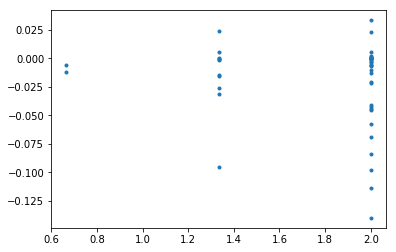

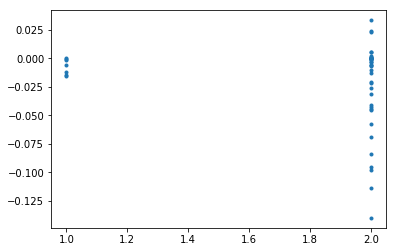

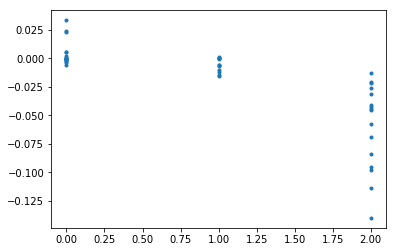

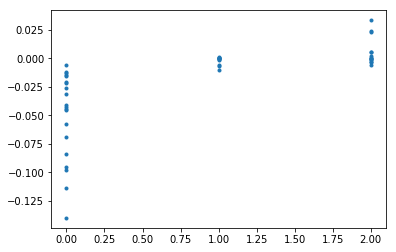

In [9]:
def get_average_improvement(df1, df2):
    ret = []
    for i, j in zip(df1,df2):
        ret.append(np.sum(j) - np.sum(i))
    return ret

improvement = get_average_improvement(bestMSE, bestCOMBO)
print(np.mean(improvement), np.std(improvement))

improvement
fig, ax = plt.subplots()
ax.plot(averageDegree,improvement, '.')
plt.show()

improvement
fig, ax = plt.subplots()
ax.plot(targetDegree,improvement, '.')
plt.show()


improvement
fig, ax = plt.subplots()
ax.plot(target_inD,improvement, '.')
plt.show()

improvement
fig, ax = plt.subplots()
ax.plot(target_outD,improvement, '.')
plt.show()

In [ ]:
np.mean(bestMSE), np.mean(bestCOMBO), np.std(bestMSE), np.std(bestCOMBO)

In [ ]:
improvement
fig, ax = plt.subplots()
ax.plot(averageDegree,improvement, '.')
plt.show()

improvement
fig, ax = plt.subplots()
ax.plot(targetDegree,improvement, '.')
plt.show()

In [ ]:
fig, ax = plt.subplots()
b,m = polyfit(proposed,generalization, 1)
text(0.05, 0.9,'Pearson coeff:' + str(pearsonr(proposed,generalization)[0])[0:4], ha='left', va='center', transform=ax.transAxes)
ax.plot(proposed,generalization, '.')
plt.plot(proposed, b + m * np.array(proposed), '-')
ax.set_xlabel("BIC")
ax.set_ylabel("GEN")
fig.savefig('Ex4MSEVsAUS.pdf', bbox_inches='tight')
plt.show()

fig, ax = plt.subplots()
b,m = polyfit(metrics,generalization, 1)
text(0.05, 0.9,'Pearson coeff:' + str(pearsonr(metrics,generalization)[0])[0:4], ha='left', va='center', transform=ax.transAxes)
ax.plot(metrics,generalization, '.')
plt.plot(metrics, b + m * np.array(metrics), '-')
ax.set_xlabel("MSE")
ax.set_ylabel("GEN")
fig.savefig('Ex4MSEVsAUS.pdf', bbox_inches='tight')
plt.show()


total = normalize(metrics) + normalize(proposed)
fig, ax = plt.subplots()
b,m = polyfit(total,generalization, 1)
text(0.05, 0.9,'Pearson coeff:' + str(pearsonr(total,generalization)[0])[0:4], ha='left', va='center', transform=ax.transAxes)
ax.plot(total,generalization, '.')
plt.plot(total, b + m * np.array(total), '-')
ax.set_xlabel("MSE")
ax.set_ylabel("GEN")
fig.savefig('Ex4MSEVsAUS.pdf', bbox_inches='tight')
plt.show()


In [ ]:
nbest = 10
final = pd.DataFrame(np.stack((metrics, proposed, total, generalization), axis = 1), columns = ['metrics', 'proposed', 'combined', 'generalization'])
print("MSE = ", np.sum(final.nsmallest(nbest, 'metrics')['generalization']))
print("BIC = ", np.sum(final.nsmallest(nbest, 'proposed')['generalization']))
print("COMB = ",np.sum(final.nsmallest(nbest, 'combined')['generalization']))